# **Modelling phase**


## **Objectives**
1. **Primary Objective**: Model the churn variable using the variables in the data.
2. **Secondary Objective**: Predict customer churn using classification models.
3. **Inference**: Provide useful insights to lower churn
4. **Comparison Objective**: Evaluate model performance :
   - Choosing the best subset of the variables to make the model.

## **Dataset Preparation**
1. **Data Splitting**: Split the data into training and testing sets.
2. **Scaling**: Apply StandardScaler to scale the data.
3. **PCA Application**:
   - Apply PCA on Dataset 2 .
   - Determine the number of components based on explained variance.

## **Modeling Approach**


### **Churn Classification**
- **Model Selection**: Start with logistic regression and choose relevant variables in the model, 
- **Evaluation**: Compare models using bic, as bic gives the best model as the sample size is large.
- **Cross-Validation**: Use cross-validation to validate model performance.

## **Comparison and Results**
1. **Performance Metrics**: Summarize and compare model performance across datasets.
2. **Discussion**: Analyze the impact of feature engineering vs. PCA and discuss trade-offs.

In [147]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [149]:
# Importing data
f_df = pd.read_csv('data/Fancy_data.csv')

## Working on the Fancy Dataset

Here we take on the engineered dataset and perform the following on it:
- Take logistic model on PCA data and interpret results.
- Take logistic model on data.
- Provide some useful insights.

In [150]:
f_df.shape

(7010, 14)

In [151]:
outlier_tag = f_df['RobustOutlier']
f_df.drop('RobustOutlier',axis=1,inplace=True)

<Axes: >

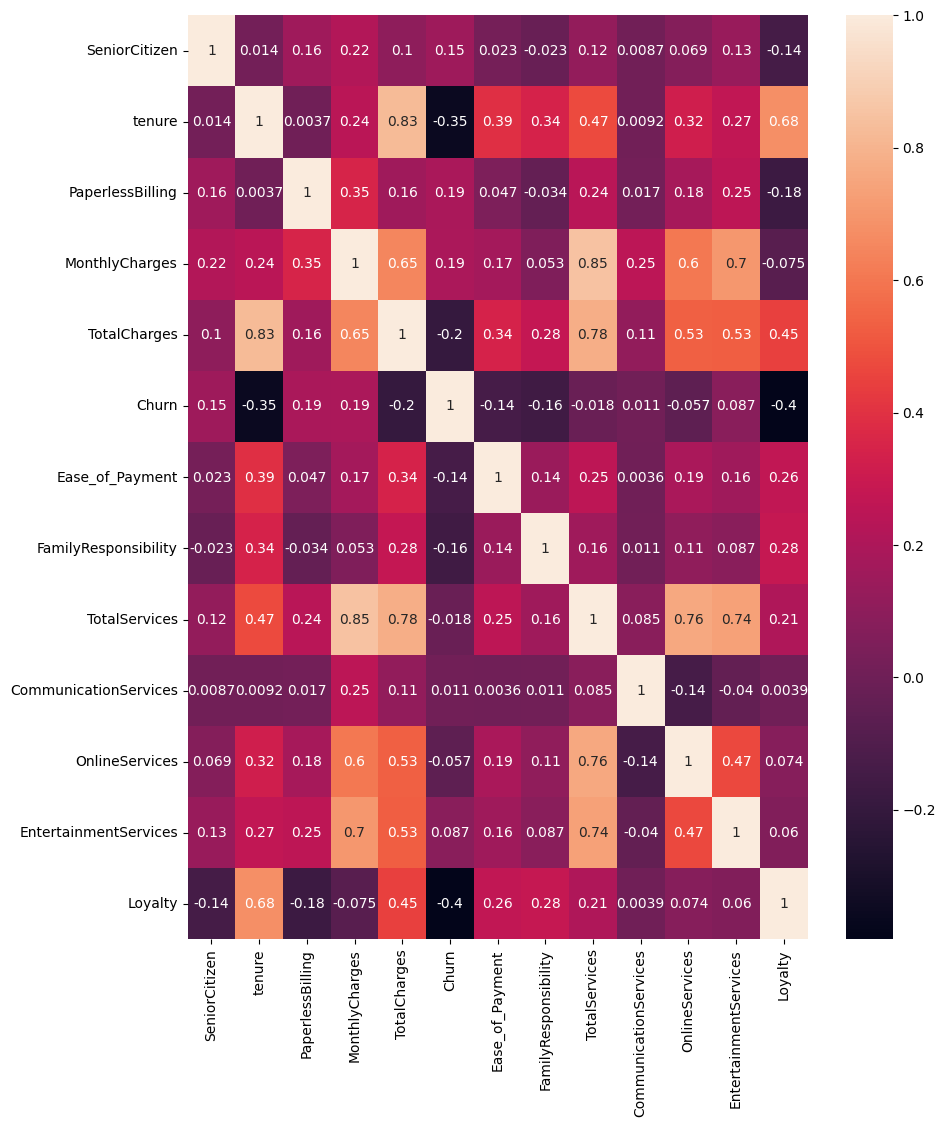

In [152]:
plt.figure(figsize=(10,12))
sns.heatmap(f_df.corr(),annot=True)

In [153]:
# Extracting response and design matrix
y = pd.DataFrame(f_df['Churn'])
X = f_df.drop(['Churn'],axis=1)

**Interpretation :** 

 * We observe that `Churn` is quite correlated with `Tenure` and `Loyalty`.
 *  Also we see that tenure is highly correlated with a lot of variables `Ease of Payment` , `FamilyResponsibility` and `Loyalty`.

### Checking Assumptions
We have to check some assumptions for the logistic model to give a relevant interpretation.
Here are some of the assumptions we are looking to check:
- Multicolinearity
- Outlier Removal
- Independence of outcomes (which we assume from the data found)
- Linearity of log

In [154]:
# Checking multicolinearity


# Calculate VIF for each variable
def vif(X):
    X_v = add_constant(X)  # include your predictors
    vif = pd.DataFrame()
    vif["Variable"] = X_v.columns
    vif["VIF"] = [variance_inflation_factor(X_v.values, i) for i in range(X_v.shape[1])]
    print(vif)
vif(X)

                 Variable        VIF
0                   const  25.821859
1           SeniorCitizen   1.097138
2                  tenure   7.378640
3        PaperlessBilling   1.192479
4          MonthlyCharges   7.616328
5            TotalCharges  10.490248
6         Ease_of_Payment   1.197647
7    FamilyResponsibility   1.143644
8           TotalServices  10.106809
9   CommunicationServices   1.413950
10         OnlineServices   2.919790
11  EntertainmentServices   2.670389
12                Loyalty   2.385026


We need to remove two columns of TotalCharges and Total_Services

In [155]:
X.drop(['TotalCharges','TotalServices'],axis=1,inplace=True)
vif(X)

                 Variable        VIF
0                   const  17.777505
1           SeniorCitizen   1.091772
2                  tenure   2.507412
3        PaperlessBilling   1.187705
4          MonthlyCharges   3.862008
5         Ease_of_Payment   1.192377
6    FamilyResponsibility   1.143256
7   CommunicationServices   1.412616
8          OnlineServices   1.965072
9   EntertainmentServices   2.273887
10                Loyalty   2.206049


In [156]:
# Outlier Removal
X['tag'] = ~outlier_tag
X = X[X['tag']]
y['tag'] = ~outlier_tag
y=y[y['tag']]

In [157]:
X.drop('tag',axis=1,inplace=True)
y.drop('tag',axis=1,inplace=True)

In [158]:
X.head()

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,Ease_of_Payment,FamilyResponsibility,CommunicationServices,OnlineServices,EntertainmentServices,Loyalty
0,0,1,1,29.85,2,1,0,1,0,0
1,0,34,0,56.95,1,0,1,1,0,1
2,0,2,1,53.85,1,0,1,1,0,0
3,0,45,0,42.30,4,0,0,1,0,1
4,0,2,1,70.70,2,0,1,0,0,0


In [159]:
X.describe()

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,Ease_of_Payment,FamilyResponsibility,CommunicationServices,OnlineServices,EntertainmentServices,Loyalty
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000
mean,0.165365,30.555122,0.599880,65.449422,2.607089,0.521178,0.897867,0.618955,0.506308,0.626915
std,0.371538,23.571542,0.489959,29.044481,1.240868,0.499589,0.302846,0.485680,0.499998,0.802884
min,0.000000,1.000000,0.000000,18.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,43.850000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,1.000000,70.800000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,52.000000,1.000000,89.700000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,1.000000,117.450000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [160]:
y.value_counts()

Churn
0        4809
1        1849
Name: count, dtype: int64

Linearity of log-odds will be checked during modelling step.

### PCA Approach

Here we take the PCA of the data, interpret the PCA elements if possible and make a model out of it. 
- We will use the scree plot to pick the number of components of PCA.
- We pick the number such that the total variability ratio over 0.8.
- Interpret the PCs and give relevant names to them.
- Fit a logistic model to the data and interpret the results.

In [161]:
# Getting the scale and pca objects
scale = StandardScaler()
pca = PCA(n_components='mle')

In [162]:
# scaling the data and applying the pca on it
x_scaled = scale.fit_transform(X)
x_pca = pca.fit_transform(x_scaled)

In [163]:
x_pca

array([[-1.30707298,  0.12085203,  3.12123255, ..., -0.66236956,
        -0.80883557,  0.47496556],
       [-0.91416137,  0.57391511, -0.14286232, ...,  0.63991306,
        -1.31465631, -0.01843514],
       [-1.46556064, -1.35846229,  0.18963972, ...,  0.52790752,
        -1.45043424,  0.44729514],
       ...,
       [-1.12745459,  0.2773987 ,  3.10440409, ..., -0.53734708,
        -0.8586197 ,  0.16293736],
       [-1.29512002, -1.6089613 , -0.65471413, ...,  0.3129114 ,
        -0.1262967 ,  0.18243994],
       [ 2.67509474,  0.38666906, -0.32463586, ...,  1.21823779,
         0.07069314,  0.13742816]])

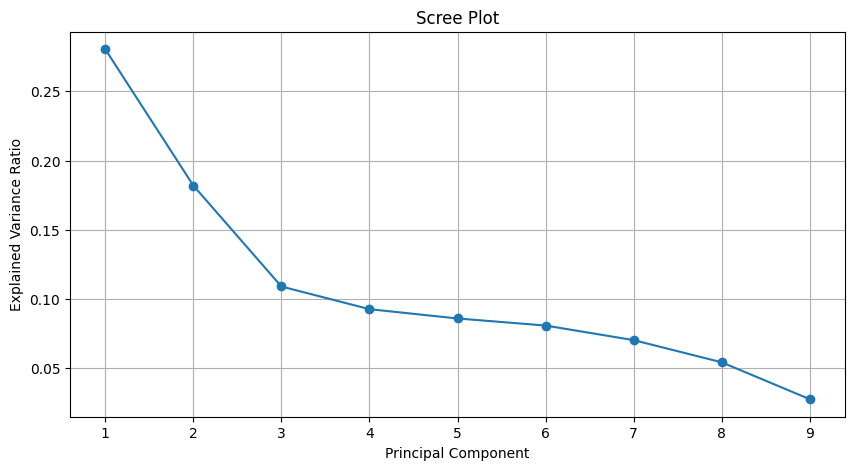

In [164]:
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# plt.savefig('vizes/scree_plot.jpg',facecolor='black', transparent=False)

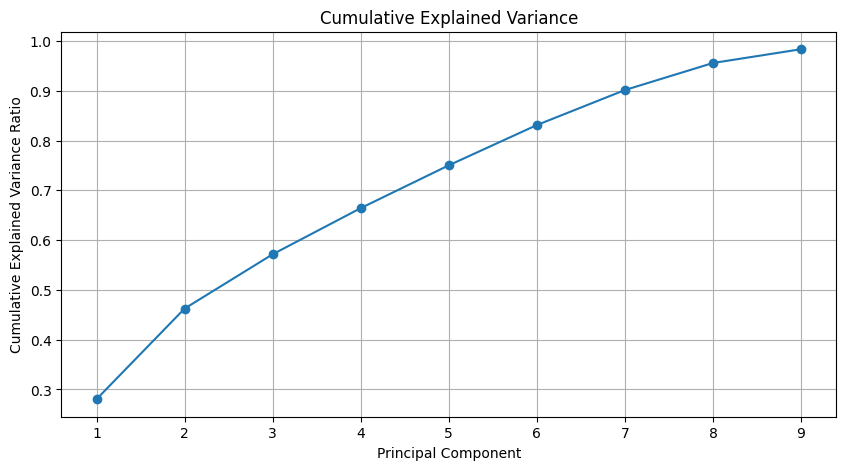

In [165]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# plt.savefig('vizes/CEV.jpg')

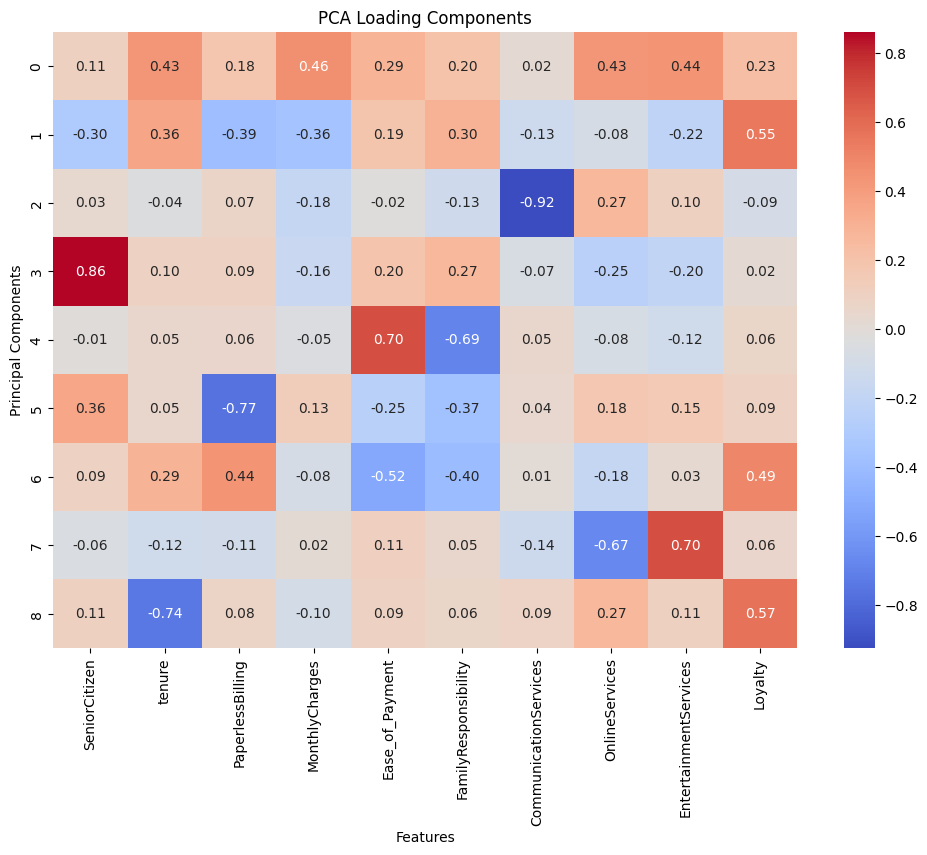

In [166]:
loading_matrix = pd.DataFrame(pca.components_, columns=X.columns)


plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loading Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# plt.savefig('vizes/loading_heatmap.jpg')

### Interpretation:

The heatmap displays the correlation between original features and principal components, highlighting key variables influencing each component. For instance, `tenure`, `TotalCharges`, and `MonthlyCharges` show strong influence across multiple components, indicating their significance in the dataset. The cumulative explained variance plot shows that the first 3-4 components capture nearly 80% of the data's variance, suggesting that these components effectively summarize the dataset's essential information. Reducing the dataset to these principal components may help simplify modeling without significant loss of information.

### Additional Interpretation on Service Variables:

The loading matrix shows that the service-related variables (`OnlineServices`, `CommunicationServices`, and `EntertainmentServices`) have a loading value of nearly 0 across all principal components. This suggests that these variables do not significantly contribute to the variance captured by the principal components. 

**Possible Implications:**
- These service variables may not provide distinct or varying information relative to the other features in the dataset, potentially indicating redundancy or uniformity in how they influence customer behavior.
- It could also imply that the variability in customer tenure and churn is more strongly driven by other factors, such as financial aspects (`TotalCharges`, `MonthlyCharges`) or commitment indicators (`Loyalty`, `Ease_of_Payment`), rather than the specific services customers subscribe to.

Given this, you might consider whether these variables are essential for your modeling or if they could be aggregated or even excluded without significant loss of predictive power.

**Conclusion** : We will take the first 4 PCs for our study.

#### **A Deeper Look on the PCS**

Now we wish to take a deeper look on the particular principal components: 

Yes, analyzing the loading components (LCs) for the first four principal components (PCs) can help identify patterns or relationships between the original variables. Let's break down the patterns we observe based on the loading components from the heatmap you provided earlier.

### Principal Component 1 (PC1)
- **High positive loadings**: `Tenure` and `TotalCharges`.
- **Moderate positive loading**: `MonthlyCharges`, `Loyalty`, `FamilyResponsiblity` and `Ease_of_Payment`.

**Interpretation**:
- PC1 seems to be taking into account the financial relationship of the customer, giving high weightage to the tenure and totalcharges variable. We can name this some thing as ***Customer Importance Index***.

### Principal Component 2 (PC2)
- **High positive loading**: `SeniorCitizen`, `PaperlessBilling` and `MonthlyCharges`.
- **Negative loading**: `Loyalty`.

**Interpretation**:
- PC2 appears to reflect customers who are `SeniorCitizen` and have higher `MonthlyCharges` and `PaperlessBilling`, but with lower `loyalty`. This component might be segmenting customers who have high age and high monthly charges but low loyalty. This signifies ***High-Value Low-Loyalty Index***.

### Principal Component 3 (PC3)
- **High positive loading**: `SeniorCitizen` and `FamilyResponsibility`.
- **Negative loadings**: `PaperlessBilling` and `Ease_of_payment`.

**Interpretation**:
- PC3 is dominated by the `FamilyResponsibility` variable, which suggests that this component might be capturing the influence of family-oriented customers. The negative loading on `PaperlessBilling` and `Ease_of_payment` might indicate that senior responsible customers with conservative approach. We can say them to be **Senior Tech Engagement Index**.

### Principal Component 4 (PC4)
- **High positive loadings**: `SeniorCitizen` and `Ease_of_Payment`.
- **Negative loadings**: `FamilyResponsibility` and `PaperlessBilling`.

**Interpretation**:
- PC4 could be interpreted as senior customers with less family responsibility. We can say them to be the **Cool Seniortiy Index**





### Logistic Regression on PC

In this section we will use statistical methods to find out various relationship between the churn and the various predictor variables. Our main focus here is to find insights rather than predictions.

In [167]:
# Taking the first 4 PCs and doing the train-test split
pca = PCA()

X_pca = x_pca[:, :4]

In [168]:
X_pca

array([[-1.30707298,  0.12085203,  3.12123255,  0.12761035],
       [-0.91416137,  0.57391511, -0.14286232, -0.97324545],
       [-1.46556064, -1.35846229,  0.18963972, -0.9271796 ],
       ...,
       [-1.12745459,  0.2773987 ,  3.10440409,  0.16927051],
       [-1.29512002, -1.6089613 , -0.65471413,  2.33291892],
       [ 2.67509474,  0.38666906, -0.32463586, -0.81991147]])

In [169]:
X_p = pd.DataFrame(X_pca,columns=['Customer Importance Index','High-Value Low-Loyalty Index','Senior Tech Engagement Index','Cool Seniortiy Index'])
# Add a constant to the PCA components (for the intercept)
X_p1 = sm.add_constant(X_p)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_p1)
result1 = logit_model.fit()

# Print the summary
print(result1.summary())
print('The BIC of the model is :', result1.bic)

ValueError: The indices for endog and exog are not aligned

**Interpretation :**

- The first PC, indicating ***Customer Importance Index*** has a significant negative coefficient. For each unit increase in the ***CII*** the odds ratio of churn decrease by a factor of exp(-0.5). The coefficient is significant.This makes an intuitive sense that customers with high importance value has a lower chance of churning.
- The second PC, namely ***High-Value Low-Loyalty Index*** has a significant positive coefficient.
- The third and fourth PC has negative coefficient values as well.

### Using non PCA Data
Now we look to model the churn based on the fancy data.
- First we scale the data.
- Fit the logistic model
- Interpret the results
- Make necessary changes to the model
- Deliver the final model.

In [52]:
## Without PCA

scale = StandardScaler()


X1_scaled = scale.fit_transform(X)

In [53]:
# Add a constant to the PCA components (for the intercept)
X_2 = pd.DataFrame(X1_scaled,columns = X.columns)
X_train_with_const = sm.add_constant(X_2)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(list(y), X_train_with_const)
result2 = logit_model.fit()

# Print the summary
print(result2.summary())
print('The BIC of the model is :', result2.bic)

Optimization terminated successfully.
         Current function value: 0.418889
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7010
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                           12
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                  0.2754
Time:                        01:32:25   Log-Likelihood:                -2936.4
converged:                       True   LL-Null:                       -4052.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7188      0.053    -32.480      0.000      -1.823      -1.

We see that the p-value for ***EntertainmentServices*** and ***Family Responsibility***  are more than 0.05, so we drop these variables in a subsequent model.


In [54]:
# Dropping these values
scale = StandardScaler()

X_1 = X.drop(['EntertainmentServices','FamilyResponsibility','Ease_of_Payment'],axis=1)
X1_scaled = scale.fit_transform(X_1)

# Add a constant to the PCA components (for the intercept)
X_2 = pd.DataFrame(X1_scaled,columns = X_1.columns)
X_train_with_const = sm.add_constant(X_2)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(list(y), X_train_with_const)
result3 = logit_model.fit()

# Print the summary
print(result3.summary())
print('The BIC of the model is :', result3.bic)

Optimization terminated successfully.
         Current function value: 0.419270
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7010
Model:                          Logit   Df Residuals:                     7000
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                  0.2748
Time:                        01:32:29   Log-Likelihood:                -2939.1
converged:                       True   LL-Null:                       -4052.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7209      0.053    -32.449      0.000      -1.825      -1.

Here all the variables are significant. 

**Observations:**

- We see that Tenure, TotalServices, CommunicationServices, Loyalty and OnlineServices have negative coefficients.
- This implies old customers are less likely to churn.
- Users having Communication Services have lesser chance of churn than having Online Services.
- Users having higher monthly charge has a higher chance of churn.

**Implications:**

- Dropping the TotalCharges variable seems reasonable as the information is nothing new if tenure and monthlycharges are already in the model.
- Also exploring the interaction term from OnlineServices and CommunicationServices may give us some idea about customers having both the services.

In [26]:
# Testing if droping TotalCharges is significant

# Drop the TotalCharges column
X_3 = X_1.drop('TotalCharges', axis=1)

scale = StandardScaler()

X_3scaled = scale.fit_transform(X_3)

X_3_df = pd.DataFrame(X_3scaled,columns = X_3.columns)
# Fit the model without TotalCharges
logit_model_without_totalcharges = sm.Logit(y, X_3_df)
result4 = logit_model_without_totalcharges.fit()

# Print summary
print(result4.summary())
print('The BIC of the model is :',result4.bic)

Optimization terminated successfully.
         Current function value: 0.580550
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7010
Model:                          Logit   Df Residuals:                     7002
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:               -0.004190
Time:                        00:47:06   Log-Likelihood:                -4069.7
converged:                       True   LL-Null:                       -4052.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SeniorCitizen             0.1201      0.029      4.198      0.000       0.064       0.

In [44]:
# Testing which model is better

lr_test_stat = 2 * (result3.llf - result4.llf)
df_diff = result3.df_model - result4.df_model

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

p_value = stats.chisqprob(lr_test_stat, df_diff)

print(f'Likelihood Ratio Test Statistic: {lr_test_stat}')
print(f'p-value: {p_value}')


Likelihood Ratio Test Statistic: 2261.1341098079447
p-value: 0.0


Here we can drop the variable of TotalCharges as the p-value is less than 0.05. But the pseudo R^2 drops significantly. So we keep the variable of TotalCharges.

In [45]:
# Adding an interaction term
X_1['ComVsOnline'] = X_1['CommunicationServices'] * X_1['OnlineServices']

scale = StandardScaler()

X4_scaled = scale.fit_transform(X_1)


X4_df = pd.DataFrame(X4_scaled,columns = X_1.columns)
# Fit the model without TotalCharges
logit = sm.Logit(y, X4_df)
result5 = logit.fit()

# Print summary
print(result5.summary())
print('The BIC of the model is :', result5.bic)

Optimization terminated successfully.
         Current function value: 0.576479
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7010
Model:                          Logit   Df Residuals:                     7000
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                0.002852
Time:                        01:07:48   Log-Likelihood:                -4041.1
converged:                       True   LL-Null:                       -4052.7
Covariance Type:            nonrobust   LLR p-value:                  0.005943
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SeniorCitizen             0.1204      0.029      4.170      0.000       0.064       0.

### Prediction

Here we look at the different models and compare them based on the different metrics on prediction.

In [ ]:
# y_pred = result.predict(sm.add_constant(X_test)) > 0.5

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# y_pred = result.predict(sm.add_constant(X_test)) > 0.5

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [7]:
# threshold = np.arange(0,1,step=0.01)
# accuracy = []

# for i in range(0,len(threshold)):
#     y_pred = result.predict(sm.add_constant(X_test)) > threshold[i]
    
#     a = confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[1,1]
#     b = len(y_test)
#     accuracy.append(a/b)

# plt.plot(threshold,accuracy)

# plt.xlabel('Threshold')
# plt.ylabel('Accuracy')

In [6]:
# y_pred = result.predict(sm.add_constant(X_test)) > 0.5

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [2]:
# from statsmodels.graphics.factorplots import interaction_plot

# # Interaction plot between PaperlessBilling and Loyalty
# interaction_plot(f_df['PaperlessBilling'], f_df['Loyalty'], f_df['Churn'])
# plt.title('Interaction Plot: PaperlessBilling vs Loyalty')
# plt.show()


In [3]:
# pearson_residuals = result.resid_pearson

In [4]:
# import matplotlib.pyplot as plt

# # Plot deviance residuals vs fitted values
# plt.scatter(result.fittedvalues, pearson_residuals, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Fitted values')
# plt.ylabel('Deviance Residuals')
# plt.title('Deviance Residuals vs Fitted Values')
# plt.show()


In [5]:


# for column in X_2.columns:
#     plt.scatter(X_2[column], pearson_residuals, alpha=0.5)
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel(column)
#     plt.ylabel('Deviance Residuals')
#     plt.title(f'Deviance Residuals vs {column}')
#     plt.show()



If we have a baseline model of predicting 0 for all values, then our accuracy will be approximately $75$%. So we have a accuracy of $81$% which is just a little better than our baseline model.

**Recommendation:**

Based on the above model fit we propose some measures to decrease churning.

- First we should promote Communication Services the most, as customers with Communication Services are more likely to stay. Then after taking Communication Services we should promote Online Services and Entertainment services as well, as it is the driving force for our revenue